In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


data = pd.read_csv("./data/20230412.csv", encoding="cp949")


# 1. 탐색적 데이터 분석(EDA)

In [39]:
# 데이터 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17682 entries, 0 to 17681
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사고신고사유        17682 non-null  object
 1   사고일시          17682 non-null  object
 2   공정율           17682 non-null  object
 3   날씨            17682 non-null  object
 4   지역            17682 non-null  object
 5   공사종류          17682 non-null  object
 6   공사비           17682 non-null  object
 7   공종소분류         17682 non-null  object
 8   사망자           17682 non-null  int64 
 9   내국인사망자        17682 non-null  int64 
 10  외국인사망자        17682 non-null  int64 
 11  남성사망자         17682 non-null  int64 
 12  여성사망자         17682 non-null  int64 
 13  10이상20미만 사망자  17682 non-null  int64 
 14  20이상30미만 사망자  17682 non-null  int64 
 15  30이상40미만 사망자  17682 non-null  int64 
 16  40이상50미만 사망자  17682 non-null  int64 
 17  50이상60미만 사망자  17682 non-null  int64 
 18  60이상사망자       17682 non-null  int64 
 19  부상자 

In [63]:
# 데이터 확인

data.head()

,사고신고사유,사고일시,공정율,날씨,지역,공사종류,공사비,공종소분류,사망자,내국인사망자,...,내국인부상자,외국인부상자,남성부상자,여성부상자,10이상20미만 부상자,20이상30미만 부상자,30이상40미만 부상자,40이상50미만 부상자,50이상60미만 부상자,60이상부상자
0,3일이상 휴업이 필요한 부상,2019-07-01 07:10:00,20~29%,맑음,경기도,건축/건축물/업무시설,10억 ~ 20억원 미만,기타,0,0,...,1,0,1,0,0,0,0,0,1,0
1,기타,2019-07-01 08:50:00,80~89%,강우,경기도,건축/건축물/공동주택,150억 ~ 200억원 미만,가설공사,0,0,...,0,1,1,0,0,0,1,0,0,0
2,3일이상 휴업이 필요한 부상,2019-07-01 09:30:00,60~69%,맑음,경기도,토목/옹벽 및 절토사면/옹벽,"1,000억원 이상",가설공사,0,0,...,1,0,1,0,0,0,0,0,1,0
3,3일이상 휴업이 필요한 부상,2019-07-01 10:00:00,90% 이상,맑음,인천광역시,토목/터널/철도터널,"500억 ~ 1,000억원 미만",가설공사,0,0,...,1,0,1,0,0,0,0,0,0,1
4,3일이상 휴업이 필요한 부상,2019-07-01 10:10:00,50~59%,맑음,경기도,건축/건축물/공동주택,"500억 ~ 1,000억원 미만",전기설비공사,0,0,...,1,0,1,0,0,0,0,0,1,0


In [189]:
# 중복값 확인
# 21개의 중복 값을 제거할 필요 있음.

data.duplicated().sum()

21

In [42]:
# 결측치 확인
missing_count = pd.concat([data.isnull().sum()], axis=1)
missing_count.columns = ["data"]

missing_count

,data
사고신고사유,0
사고일시,0
공정율,0
날씨,0
지역,0
공사종류,0
공사비,0
공종소분류,0
사망자,0
내국인사망자,0


In [43]:
# 통계치 확인
data.describe()

,사망자,내국인사망자,외국인사망자,남성사망자,여성사망자,10이상20미만 사망자,20이상30미만 사망자,30이상40미만 사망자,40이상50미만 사망자,50이상60미만 사망자,...,내국인부상자,외국인부상자,남성부상자,여성부상자,10이상20미만 부상자,20이상30미만 부상자,30이상40미만 부상자,40이상50미만 부상자,50이상60미만 부상자,60이상부상자
count,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,...,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000,17682.000000
mean,0.053388,0.046601,0.006787,0.051861,0.001584,0.000057,0.001584,0.003450,0.006334,0.021434,...,0.850696,0.112544,0.936885,0.027938,0.000622,0.037439,0.084945,0.199808,0.371791,0.270162
std,0.374639,0.346564,0.089990,0.366075,0.059195,0.007520,0.043823,0.068428,0.106698,0.164916,...,0.412315,0.322597,0.347864,0.173819,0.024935,0.193967,0.281030,0.406321,0.490844,0.468355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,38.000000,35.000000,3.000000,38.000000,6.000000,1.000000,3.000000,4.000000,10.000000,10.000000,...,10.000000,4.000000,14.000000,6.000000,1.000000,4.000000,3.000000,4.000000,4.000000,14.000000


In [82]:
# 통계치 확인(범주형 데이터, 사고신고사유)
# 큰 틀에서 사망 1명 이상, 3일이상 휴업이 필요한 부상, 1000만원 이상의 재산피해로 나눠볼 수 있다
# 사고신고를 할 땐 최악의 상황을 가정하고 약식신청을 한 후 이후 정확히 소명한다
# 사고신고사유 칼럼 외에 뒤에 사망자, 부상자 수, 각 연령대별 사망자, 부상자 수가 수치 데이터로 존재하기 때문에 필요 없을 수도 있음

print(data["사고신고사유"].unique())

# 사고신고사유 값 중 "기타"인 값이 몇 개인지 확인

print((data["사고신고사유"] == "기타").sum())

['3일이상 휴업이 필요한 부상' '기타' '사망 1명 이상' '사망 1명 이상, 3일이상 휴업이 필요한 부상'
 '3일이상 휴업이 필요한 부상, 기타' '사망 1명 이상, 기타' '1000만원 이상의 재산피해, 3일이상 휴업이 필요한 부상'
 '사망 1명 이상, 1000만원 이상의 재산피해, 3일이상 휴업이 필요한 부상' '1000만원 이상의 재산피해'
 '1000만원 이상의 재산피해, 기타' '사망 1명 이상, 1000만원 이상의 재산피해'
 '1000만원 이상의 재산피해, 3일이상 휴업이 필요한 부상, 기타'
 '사망 1명 이상, 1000만원 이상의 재산피해, 3일이상 휴업이 필요한 부상, 기타']
353


In [79]:
# 통계치 확인(범주형 데이터, 공정율)

print(data["공정율"].unique())

# 공정율 값 중 "미입력"인 값이 몇 개인지 확인

print((data["공정율"] == "미입력").sum())

['20~29%' '80~89%' '60~69%' '90% 이상' '50~59%' '30~39%' '10~19%' '10% 미만'
 '70~79%' '40~49%' '미입력']
1


In [84]:
# 통계치 확인(범주형 데이터, 날씨)

data["날씨"].unique()

array(['맑음', '강우', '흐림', '안개', '강풍', '강설'], dtype=object)

In [183]:
# 통계치 확인(범주형 데이터, 공사종류)
# 소분류까지 가면 너무 많은 소분류가 있다.

data["공사종류"].unique()

# 공사종류 각 값의 개수 확인
# 각 값의 개수가 천차만별이다.

data["공사종류"].value_counts()


공사종류
건축/건축물/공동주택      5169
건축/건축물/공장        1542
건축/건축물/업무시설      1317
건축/건축물/근린생활시설    1108
건축/건축물/교육연구시설    1074
                 ... 
토목/터널               1
토목/댐/홍수전용댐          1
토목/교량/복개구조물         1
토목/항만               1
건축                  1
Name: count, Length: 87, dtype: int64

In [90]:
# 통계치 확인(범주형 데이터, 공사비)

print(data["공사비"].unique())

# 공사비 값 중 "분류불능", "미입력"인 값이 몇 개인지 확인

print("분류불능 :", (data["공사비"] == "분류불능").sum())
print("미입력 : ", (data["공사비"] == "미입력").sum())

['10억 ~ 20억원 미만' '150억 ~ 200억원 미만' '1,000억원 이상' '500억 ~ 1,000억원 미만'
 '50억 ~ 100억원 미만' '300억 ~ 500억원 미만' '2,000만 ~ 4,000만원 미만'
 '100억 ~ 150억원 미만' '200억 ~ 300억원 미만' '5억 ~ 10억원 미만' '3억 ~ 5억원 미만'
 '1,000만원 미만' '20억 ~ 50억원 미만' '1억 ~ 2억원 미만' '2억 ~ 3억원 미만' '분류불능'
 '4,000만 ~ 1억원 미만' '1,000만 ~ 2,000만원 미만' '미입력']
분류불능 : 94
미입력 :  1


In [45]:
# 통계치 확인(범주형 데이터, 공종소분류)

print(data["공종소분류"].unique())

# 공종소분류의 각 값의 개수를 확인
# 각 값의 개수가 천차만별이다.
print(data["공종소분류"].value_counts())

# 공종소분류 값 중 "미입력", "기타"인 값이 몇 개인지 확인

print("미입력 :", (data["공종소분류"] == "미입력").sum())
print("기타 :", (data["공종소분류"] == "기타").sum())

['기타' '가설공사' '전기설비공사' '철근콘크리트공사' '건축 토공사' '철골공사' '토공사' '해체 및 철거공사' '금속공사'
 '관공사' '건축물 부대공사' '도로 및 포장공사' '방수공사' '미장공사' '기계설비공사' '하천공사' '조적공사' '수장공사'
 '타일 및 돌공사' '교량공사' '지반조사' '강구조물공사' '창호 및 유리공사' '목공사' '터널공사' '철도 및 궤도공사'
 '산업설비공사' '도장공사' '특수 건축물공사' '지붕 및 홈통공사' '지반개량공사' '말뚝공사' '프리캐스트 콘크리트공사'
 '항만공사' '관공사 부대공사' '조경공사' '댐 및 제방공사' '지정공사' '통신설비공사' '미입력']
공종소분류
철근콘크리트공사        5118
가설공사            1919
기타              1790
해체 및 철거공사        833
기계설비공사           715
토공사              669
철골공사             566
수장공사             443
건축 토공사           440
관공사              431
전기설비공사           422
건축물 부대공사         407
미장공사             390
타일 및 돌공사         353
도로 및 포장공사        302
교량공사             270
산업설비공사           255
도장공사             225
조적공사             223
터널공사             210
목공사              201
금속공사             183
창호 및 유리공사        175
하천공사             173
방수공사             146
관공사 부대공사         145
항만공사             124
지붕 및 홈통공사        124
말뚝공사              90
지정공사              72
철도 및 궤도공사    

In [ ]:
# 통계치 확인(나이별 사망자, 부상자)
# 이 부분에서 큰 문제가 있다. 일단 각 나이별로 표본의 수(사고가 난 시점에서 근무하고 있었던 근무자 수)가 나와있지 않다는 것이다.
# 현재 통계치를 보면 젊은 층보다 중장년 층에서 사고자 수가 높다. 이를 통해 중장년 층이 사고를 당할 확률이 높다고 생각하면 안됀다.
# 애초에 중장년층 작업자가 대다수였고, 똑같은 확률로 사고를 당했는데, 표본(중장년층 작업자)이 많아서 중장년층  사고자가 많을 수 있다.
# 때문에 이 데이터를 학습에 사용했다간 결과가 왜곡될 수도 있다.


In [98]:
# 이상치 확인(사망자)
# 건설업에서는 사망자 1명도 매우 중대한 사고로 다룬다. 따라서 사망자가 많은 사고의 경우 재해자 본인의 특징보다 아니라 특수한 환경, 위법사항 등이 더 크게 작용할 수 있다.
# 따라서 이를 이상치로 간주하고 제거.

data[["사망자", "내국인사망자", "외국인사망자"]]

,사망자,내국인사망자,외국인사망자
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17677,0,0,0
17678,0,0,0
17679,0,0,0
17680,0,0,0


In [55]:
# 이상치 확인(부상자)
# 건설업에서는 부상자가 사망자보다 흔하다. 또한 이 데이터에서는 부상의 정도 등을 파악할 수 없고, 데이터 값 자체도 크게 튀는 값이 없으므로 그대로 학습에 쓴다.

data[["부상자", "내국인부상자", "외국인부상자"]]

,부상자,내국인부상자,외국인부상자
0,1,1,0
1,1,0,1
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
17677,1,1,0
17678,1,0,1
17679,1,1,0
17680,1,1,0


# 1.1 데이터 전처리

In [187]:
# 중복 행 제거
preprocessed_data = data.drop_duplicates()

# 사고신고사유, 사고일시, 지역 칼럼 제거
preprocessed_data = preprocessed_data.drop(["사고신고사유", "사고일시", "지역"], axis=1)

# 공정율 "미입력"값 제거
preprocessed_data.drop(preprocessed_data[preprocessed_data['공정율'] == '미입력'].index, inplace=True)

# 공정률 범주형 데이터 수치화
mapping = {"10% 미만": 0, "10~19%": 1, "20~29%": 2, "30~39%": 3, "40~49%": 4, "50~59%": 5, "60~69%": 6, "70~79%": 7, "80~89%": 8, "90% 이상": 9}
preprocessed_data["공정율"] = preprocessed_data["공정율"].replace(mapping)

# 날씨 범주형 데이터 수치화
mapping = {"맑음": 0, "흐림": 1, "강우": 2, "안개": 3, "강풍": 4, "강설": 5}
preprocessed_data["날씨"] = preprocessed_data["날씨"].replace(mapping)

# 공사비 미입력 삭제, 분류 불능 삭제
preprocessed_data.drop(preprocessed_data[preprocessed_data["공사비"] == "미입력"].index, inplace=True)
preprocessed_data.drop(preprocessed_data[preprocessed_data["공사비"] == "분류불능"].index, inplace=True)

# 공사비 범주형 데이터 수치화
# 공사비 증가분은 선형적으로 증가하지 않고 지수함수 꼴로 증가하므로 그 것을 반영해 공사비 중앙값을 백 만원으로 나눈 값을 수치 데이터로 사용했다.
# ex1) '1,000만 ~ 2,000만원 미만'의 중앙값은 1500만이다. 이를 백만으로 나누면 15이다.
# ex2) '150억 ~ 200억원 미만'의 중앙값은 175억이다. 이를 백만으로 나누면 17500이다.
a = ['1,000만원 미만',
 '1,000만 ~ 2,000만원 미만',
 '2,000만 ~ 4,000만원 미만',
 '4,000만 ~ 1억원 미만',
 '1억 ~ 2억원 미만',
 '2억 ~ 3억원 미만',
 '3억 ~ 5억원 미만',
 '5억 ~ 10억원 미만',
 '10억 ~ 20억원 미만',
 '20억 ~ 50억원 미만',
 '50억 ~ 100억원 미만',
 '100억 ~ 150억원 미만',
 '150억 ~ 200억원 미만',
 '200억 ~ 300억원 미만',
 '300억 ~ 500억원 미만',
 '500억 ~ 1,000억원 미만',
 '1,000억원 이상']

b = ["5",
 "15",
 "30",
 "70",
 "150",
 "250",
 "400",
 "750",
 "1500",
 "3500",
 "7500",
 "12500",
 "17500",
 "25000",
 "40000",
 "75000",
 "150000"]

mapping = dict(zip(a, map(int, b)))
preprocessed_data["공사비"] = preprocessed_data["공사비"].replace(mapping)

# 공종소분류 칼럼 제거
preprocessed_data = preprocessed_data.drop(["공종소분류"], axis=1)

# 공사종류 칼럼 삭제
preprocessed_data = preprocessed_data.drop(["공사종류"], axis=1)
preprocessed_data

# 국적별 사상자, 성별별 사상자, 나이별 사상자 칼럼 삭제
# 위의 데이터 통계치 확인에서 언급했듯이 국적별 사상자와 성별별 사상자도 나이별 사상자와 마찬가지로 표본이 나와있지 않고 결과 값만 나와 있다. 따라서 제거한다.
preprocessed_data.drop(preprocessed_data.columns[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13]], axis=1, inplace=True)
preprocessed_data.drop(preprocessed_data.columns[5:], axis=1, inplace=True)

# 사망자가 38명인 데이터 제거
preprocessed_data.drop(preprocessed_data[preprocessed_data["사망자"] == 38].index, inplace=True)

# 전처리된 데이터 확인, 및 저장
preprocessed_data.to_csv("./data/preprocessed_data.csv")
new_names = ["Process rate", "Weather", "Construction Cost", "Fatality", "Injuries"]

# 칼럼 이름 영어로 변경(한글 폰트 깨짐 때문에)
preprocessed_data.rename(columns=dict(zip(list(preprocessed_data.columns), new_names)), inplace=True)
preprocessed_data.to_csv("./data/preprocessed_data.csv")

# 1.2 데이터 스케일 정규화

In [155]:
# Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(preprocessed_data), columns=preprocessed_data.columns)
scaled_data.to_csv("./data/scaled_data.csv")


# 1.3 공분산 행렬 시각화

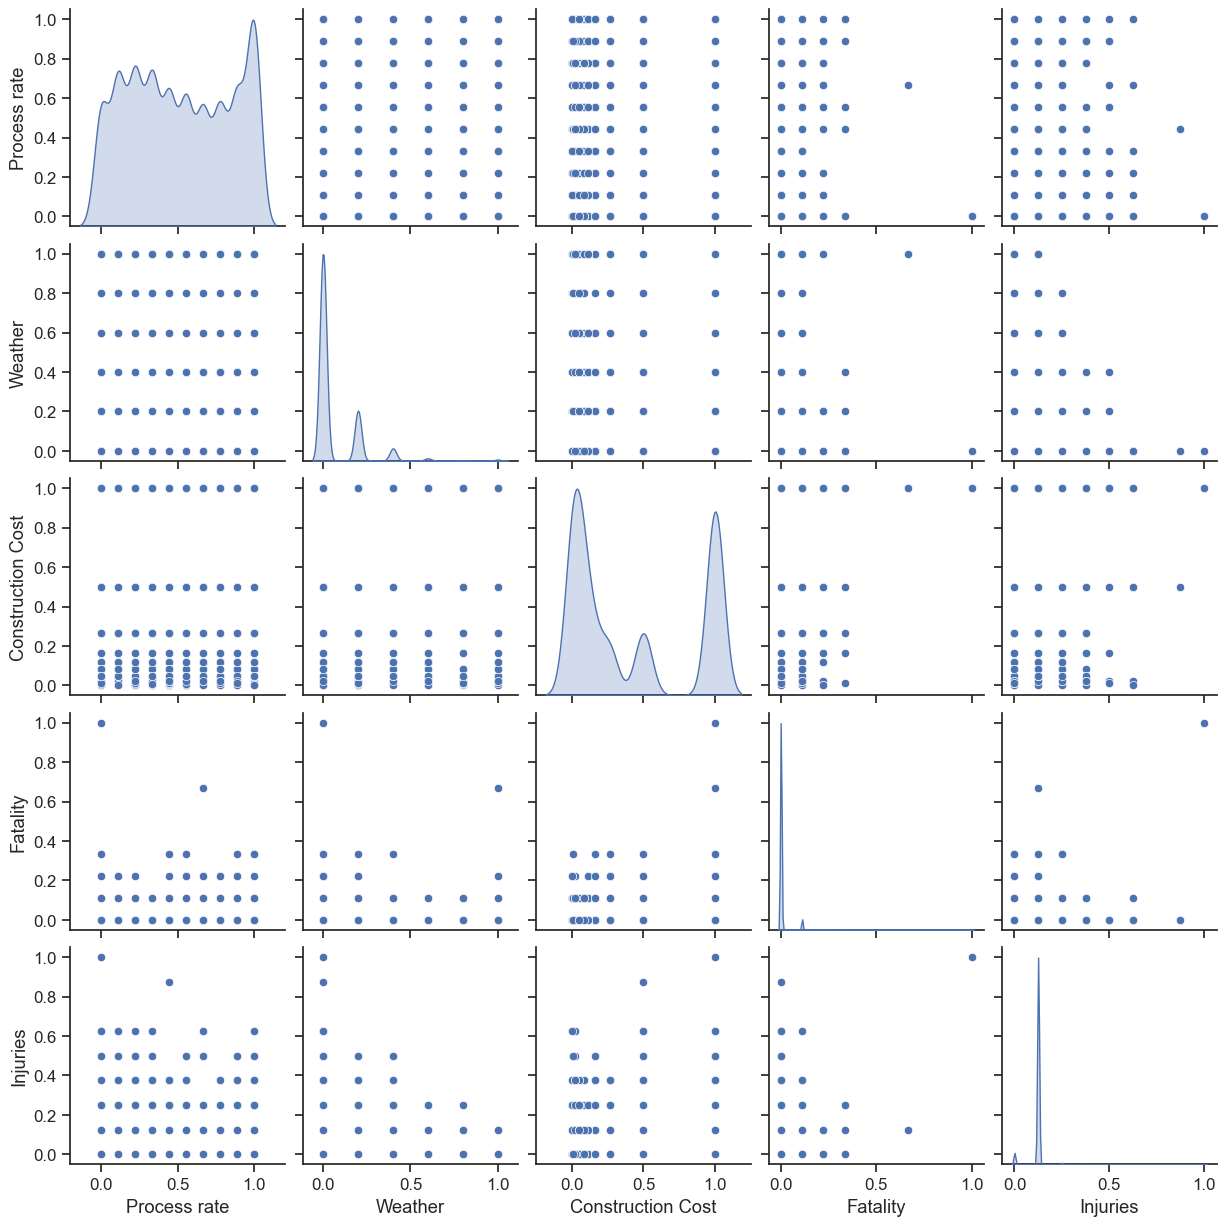

In [156]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
sns.pairplot(scaled_data, diag_kind="kde")
plt.show()

# 1.4 피어슨 상관계수 시각화

<Axes: >

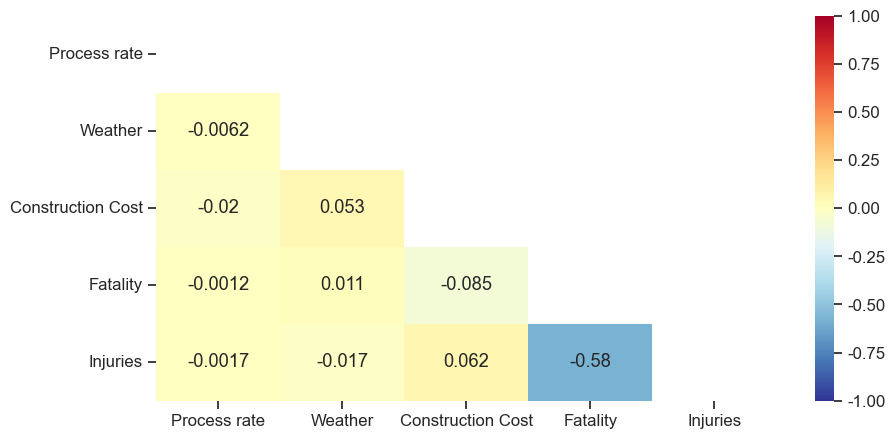

In [162]:
np.triu(np.ones_like(scaled_data.corr()))
mask = np.triu(np.ones_like(scaled_data.corr(), dtype=bool))

# 히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(scaled_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlBu_r", cbar=True)


# 결과
+ 공분산 행렬 관찰 결과 선형적인 움직임을 관찰할 수 없었다.
+ 마찬가지로 피어슨계수 관찰 결과 피어슨계수가 모두 0에 가까웠다.
+ 데이터간 관계가 비선형적이므로 비선형적 패턴을 감지할 수 있는 모델을 사용해야겠다.

# 2. 모델링

In [265]:
scaled_data

,Process rate,Weather,Construction Cost,Construction Category,Fatality,Injuries
0,0.222222,0.0,0.009967,0.000000,0.0,0.125
1,0.888889,0.4,0.116637,0.037037,0.0,0.125
2,0.666667,0.0,1.000000,0.037037,0.0,0.125
3,1.000000,0.0,0.499983,0.037037,0.0,0.125
4,0.555556,0.0,0.499983,0.074074,0.0,0.125
...,...,...,...,...,...,...
17560,0.111111,0.0,1.000000,0.111111,0.0,0.125
17561,0.111111,0.0,1.000000,0.111111,0.0,0.125
17562,1.000000,0.2,0.049968,0.296296,0.0,0.125
17563,1.000000,0.2,0.499983,0.740741,0.0,0.125


In [180]:
# 랜덤포레스트

# 독립변수와 종속변수 분리
X = scaled_data[["Process rate", "Weather", "Construction Cost"]]
y = scaled_data[["Fatality", "Injuries"]]

# 데이터 분할 (학습 데이터와 테스트 데이터로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RFR_model = RandomForestRegressor()

# 탐색할 하이퍼파라미터 범위 설정(랜덤 서치로 튜닝)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(1, 50)),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(
    RFR_model,
    param_distributions=param_dist,
    n_iter=100,  # 총 탐색 횟수
    cv=5,       # 교차 검증 폴드 수
    n_jobs=-1,  # 병렬 처리 사용 (-1은 모든 가능한 프로세서 사용)
    random_state=42,
    scoring='neg_mean_squared_error',  # 탐색 목표 (평가 지표)
    verbose=1
)

# 랜덤 서치 실행
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv

최적의 하이퍼파라미터: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'min_samples_split': 40, 'n_estimators': 382}


In [185]:
random_search.best_estimator_

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=14,
                      min_samples_split=40, n_estimators=382)

In [186]:
# 최적의 하이퍼파라미터로 모델 생성
best_RFR_model = random_search.best_estimator_

# 모델 학습
best_RFR_model.fit(X_train, y_train)

# 예측
y_pred = best_RFR_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression - MSE: {mse}, R-squared: {r2}")


Random Forest Regression - MSE: 0.0009644511346715827, R-squared: 0.028047810324013434


In [ ]:
# 모델 성능이 너무 안나와서 가설 2번을 살린다.
# 공종소분류 칼럼을 살리고 칼럼 중 칼럼 값 개수 100개 미만을 제거한다.
# 공종소분류 칼럼 값을 범주형에서 수치형으로 변환한다.
# 사망자와 부상자 칼럼을 합쳐 사상자 칼럼으로 만든 후, 사상자 칼럼 값을 사상자 발생 여부(0 or 1)로 바꾼다.
# 사상자가 1명 이상이라면 1, 0명이면 0이다.
# 학습 모델을 랜덤포레스트분류로 바꾸어 학습을 진행해본다.

# 3.1 데이터 전처리(수정)

In [7]:
# 중복 행 제거
preprocessed_data = data.drop_duplicates()

# 사고신고사유, 사고일시, 지역 칼럼 제거
preprocessed_data = preprocessed_data.drop(["사고신고사유", "사고일시", "지역"], axis=1)

# 공정율 "미입력"값 제거
preprocessed_data.drop(preprocessed_data[preprocessed_data['공정율'] == '미입력'].index, inplace=True)

# 공정률 범주형 데이터 수치화
mapping = {"10% 미만": 0, "10~19%": 1, "20~29%": 2, "30~39%": 3, "40~49%": 4, "50~59%": 5, "60~69%": 6, "70~79%": 7, "80~89%": 8, "90% 이상": 9}
preprocessed_data["공정율"] = preprocessed_data["공정율"].replace(mapping)

# 날씨 범주형 데이터 수치화
mapping = {"맑음": 0, "흐림": 1, "강우": 2, "안개": 3, "강풍": 4, "강설": 5}
preprocessed_data["날씨"] = preprocessed_data["날씨"].replace(mapping)

# 공사비 미입력 삭제, 분류 불능 삭제
preprocessed_data.drop(preprocessed_data[preprocessed_data["공사비"] == "미입력"].index, inplace=True)
preprocessed_data.drop(preprocessed_data[preprocessed_data["공사비"] == "분류불능"].index, inplace=True)

# 공사비 범주형 데이터 수치화
# 공사비 증가분은 선형적으로 증가하지 않고 지수함수 꼴로 증가하므로 그 것을 반영해 공사비 중앙값을 백 만원으로 나눈 값을 수치 데이터로 사용했다.
# ex1) '1,000만 ~ 2,000만원 미만'의 중앙값은 1500만이다. 이를 백만으로 나누면 15이다.
# ex2) '150억 ~ 200억원 미만'의 중앙값은 175억이다. 이를 백만으로 나누면 17500이다.
a = ['1,000만원 미만',
 '1,000만 ~ 2,000만원 미만',
 '2,000만 ~ 4,000만원 미만',
 '4,000만 ~ 1억원 미만',
 '1억 ~ 2억원 미만',
 '2억 ~ 3억원 미만',
 '3억 ~ 5억원 미만',
 '5억 ~ 10억원 미만',
 '10억 ~ 20억원 미만',
 '20억 ~ 50억원 미만',
 '50억 ~ 100억원 미만',
 '100억 ~ 150억원 미만',
 '150억 ~ 200억원 미만',
 '200억 ~ 300억원 미만',
 '300억 ~ 500억원 미만',
 '500억 ~ 1,000억원 미만',
 '1,000억원 이상']

b = ["5",
 "15",
 "30",
 "70",
 "150",
 "250",
 "400",
 "750",
 "1500",
 "3500",
 "7500",
 "12500",
 "17500",
 "25000",
 "40000",
 "75000",
 "150000"]

mapping = dict(zip(a, map(int, b)))
preprocessed_data["공사비"] = preprocessed_data["공사비"].replace(mapping)

# 공종소분류 칼럼 제거(수정사항 : 제거 안하고 다시 사용함)
# preprocessed_data = preprocessed_data.drop(["공종소분류"], axis=1)

# 공종소분류 칼럼 값 개수 100미만 기타에 편입
threshold = 100
counts = preprocessed_data["공종소분류"].value_counts()
other_values = counts[counts <= threshold].index
count_other = counts[other_values].sum()
counts["기타"] = count_other
preprocessed_data.loc[preprocessed_data["공종소분류"].isin(other_values), "공종소분류"] = "기타"

# 공종소분류 범주형 데이터 수치화
a = preprocessed_data["공종소분류"].unique()
b = list(range(28))
mapping = dict(zip(a, b))
preprocessed_data["공종소분류"] = preprocessed_data["공종소분류"].replace(mapping)

# 공사종류 칼럼 삭제
preprocessed_data = preprocessed_data.drop(["공사종류"], axis=1)

# 국적별 사상자, 성별별 사상자, 나이별 사상자 칼럼 삭제
# 위의 데이터 통계치 확인에서 언급했듯이 국적별 사상자와 성별별 사상자도 나이별 사상자와 마찬가지로 표본이 나와있지 않고 결과 값만 나와 있다. 따라서 제거한다.
preprocessed_data.drop(preprocessed_data.columns[[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]], axis=1, inplace=True)
preprocessed_data.drop(preprocessed_data.columns[6:], axis=1, inplace=True)

# 사망자가 38명인 데이터 제거
preprocessed_data.drop(preprocessed_data[preprocessed_data["사망자"] == 38].index, inplace=True)

# 칼럼 이름 영어로 변경(한글 폰트 깨짐 때문에)
new_names = ["Process rate", "Weather", "Construction Cost", "Construction Category", "Fatality", "Injuries"]
preprocessed_data.rename(columns=dict(zip(list(preprocessed_data.columns), new_names)), inplace=True)
preprocessed_data.to_csv("./data/preprocessed_data.csv")

# 사망자, 부상자를 합쳐서 사상자 칼럼으로 만듬
preprocessed_data["Casulties"] = preprocessed_data["Fatality"] + preprocessed_data["Injuries"]
preprocessed_data = preprocessed_data.drop(["Fatality", "Injuries"], axis=1)

# 사상자 각 값이 1 이상인 경우 1로 변경
preprocessed_data['Casulties'] = preprocessed_data['Casulties'].apply(lambda x: 1 if x >= 1 else 0)

preprocessed_data

,Process rate,Weather,Construction Cost,Construction Category,Casulties
0,2,0,1500,0,1
1,8,2,17500,1,1
2,6,0,150000,1,1
3,9,0,75000,1,1
4,5,0,75000,2,1
...,...,...,...,...,...
17677,1,0,150000,3,1
17678,1,0,150000,3,1
17679,9,1,7500,8,1
17680,9,1,75000,20,1


# 3.2 데이터 스케일 정규화(수정)

In [8]:
# Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(preprocessed_data), columns=preprocessed_data.columns)
scaled_data.to_csv("./data/scaled_data.csv")


# 3.3 공분산 행렬 시각화(수정)

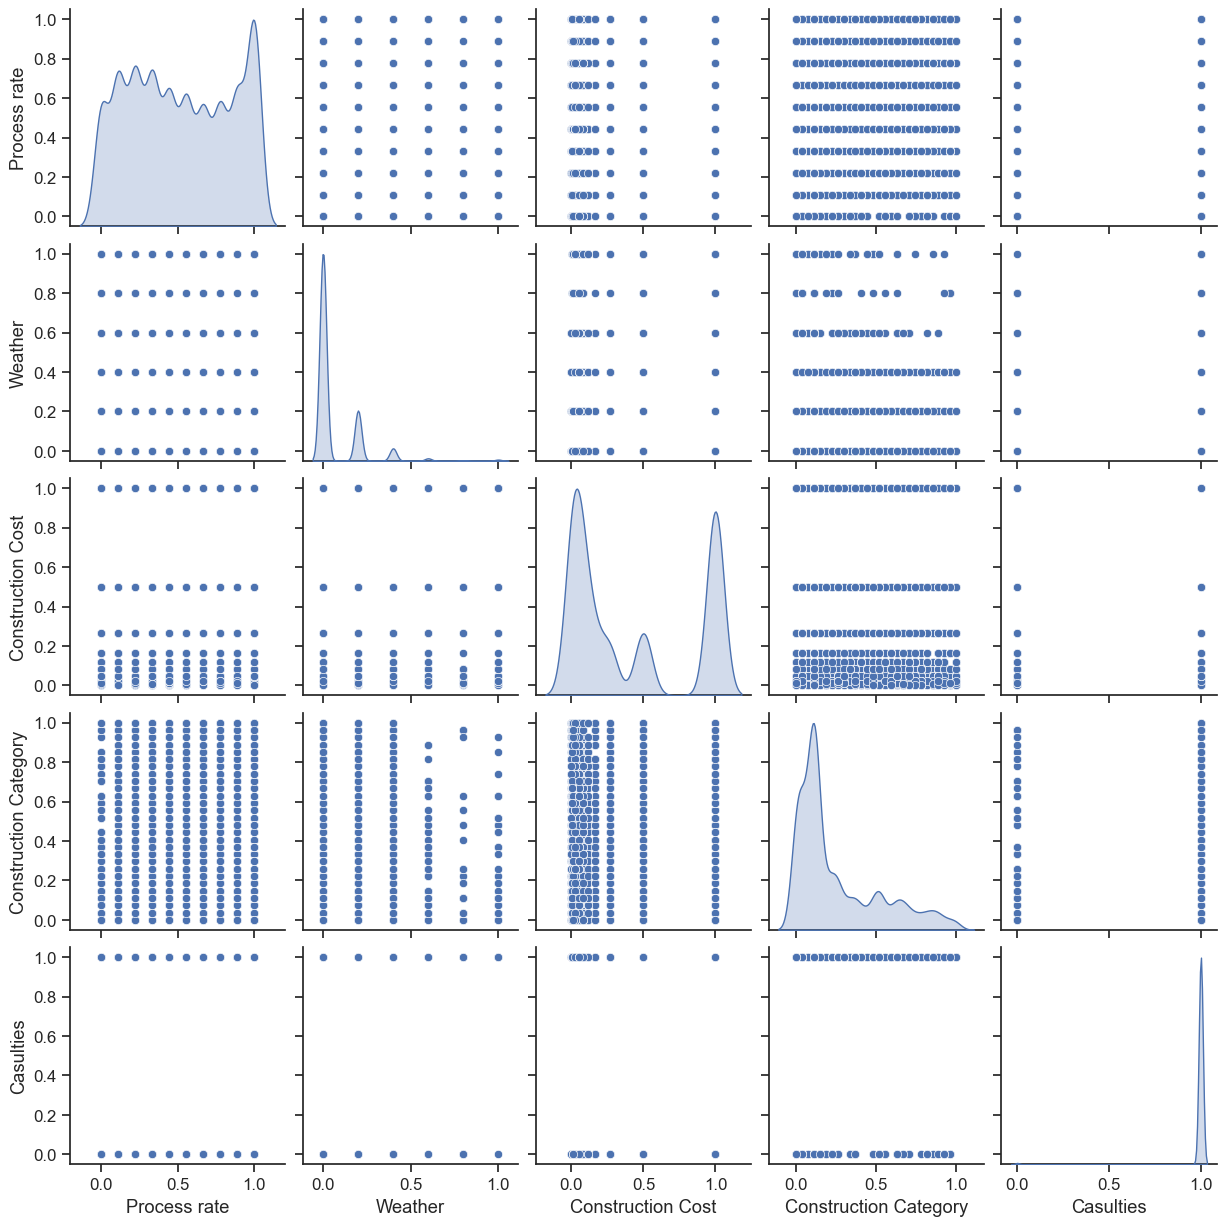

In [9]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
sns.pairplot(scaled_data, diag_kind="kde")
plt.show()

# 3.4 피어슨 상관계수 시각화(수정)

<Axes: >

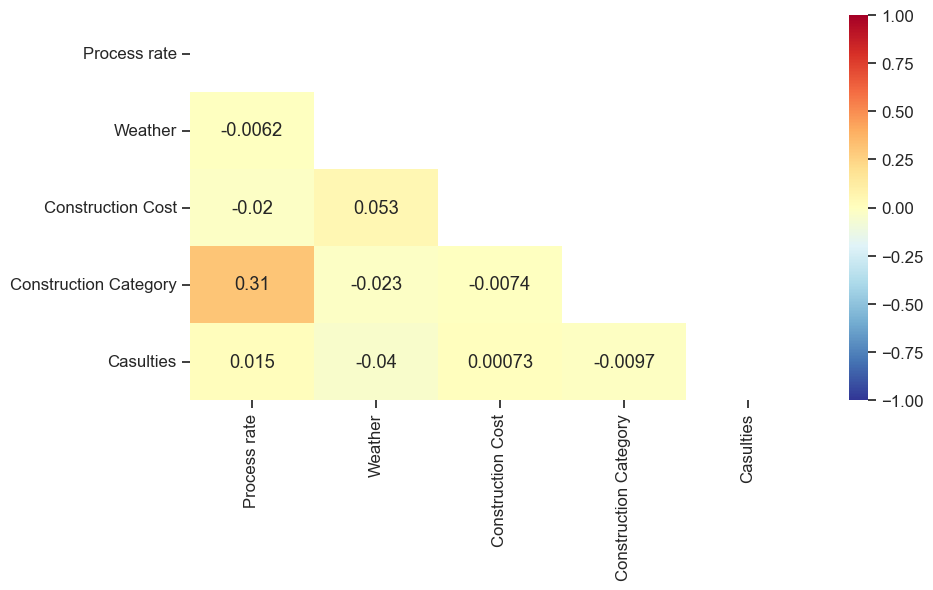

In [10]:
np.triu(np.ones_like(scaled_data.corr()))
mask = np.triu(np.ones_like(scaled_data.corr(), dtype=bool))

# 히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(scaled_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlBu_r", cbar=True)


# 4. 모델링(수정)

In [11]:
scaled_data

,Process rate,Weather,Construction Cost,Construction Category,Casulties
0,0.222222,0.0,0.009967,0.000000,1.0
1,0.888889,0.4,0.116637,0.037037,1.0
2,0.666667,0.0,1.000000,0.037037,1.0
3,1.000000,0.0,0.499983,0.037037,1.0
4,0.555556,0.0,0.499983,0.074074,1.0
...,...,...,...,...,...
17560,0.111111,0.0,1.000000,0.111111,1.0
17561,0.111111,0.0,1.000000,0.111111,1.0
17562,1.000000,0.2,0.049968,0.296296,1.0
17563,1.000000,0.2,0.499983,0.740741,1.0


In [12]:
# 랜덤포레스트

# 독립변수와 종속변수 분리
X = scaled_data[["Weather", "Process rate", "Construction Cost", "Construction Category"]]
y = scaled_data[["Casulties"]]

# 데이터 분할 (학습 데이터와 테스트 데이터로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RFC_model = RandomForestClassifier()

# 탐색할 하이퍼파라미터 범위 설정(랜덤 서치로 튜닝)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(1, 50)),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(
    RFC_model,
    param_distributions=param_dist,
    n_iter=100,  # 총 탐색 횟수
    cv=5,       # 교차 검증 폴드 수
    n_jobs=-1,  # 병렬 처리 사용 (-1은 모든 가능한 프로세서 사용)
    random_state=42,
    scoring='neg_mean_squared_error',  # 탐색 목표 (평가 지표)
    verbose=1
)

# 랜덤 서치 실행
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv

최적의 하이퍼파라미터: {'max_depth': 39, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 153}


In [66]:
random_search.best_estimator_

RandomForestClassifier(max_depth=38, max_features=None, min_samples_leaf=29,
                       min_samples_split=16, n_estimators=206)

In [67]:
# 최적의 하이퍼파라미터로 모델 생성
best_RFC_model = random_search.best_estimator_

# 모델 학습
best_RFC_model.fit(X_train, y_train)

# 예측
y_pred = best_RFC_model.predict(X_test)

# 회귀모델 평가
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Random Forest Classifier - MSE: {mse}, R-squared: {r2}")

# 분류모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mrx = confusion_matrix(y_test, y_pred)

print("accuracy :", accuracy, "\nprecision :", precision, "\nrecall :", recall, "\nf1 :", f1, "\nconfusion_matrix :\n", confusion_mrx)

C:\Users\user\Desktop\Predicting-Safety-Accident-Casualty\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy : 0.9449715370018975 
precision : 0.9449715370018975 
recall : 1.0 
f1 : 0.9717073170731708 
confusion_matrix :
 [[   0  290]
 [   0 4980]]


In [37]:
# 특성 중요도 확인
feature_importance = best_RFC_model.feature_importances_
feature_importance

array([0.15792709, 0.23461922, 0.31618544, 0.29126825])

# 최종 결과
+ 데이터의 한계로 모델을 만들 수 없었다.
+ 모델의 정확도와 혼동행렬은 좋게 나왔으나 전체 데이터 중 사상자가 나온 케이스가 99%이상을 차지했음. ML모델이 결과를 사상자가 나왔다고만 답해도 99%확률로 맞는 결과가 나와버림.
+ 사상자 파생변수를 다시 사망자, 부상자로 찢어서, 사망자 발생 예측, 부상자 발생 예측을 시도해보려 했으나 이 마저도 사망자 데이터는 전체에 비해 너무 적고 부상자 데이터는 전체에 비해 너무 많았다.
+ 최대한 필요한 데이터만 추려서 전처리 했으나 데이터에 한계가 드러나서 모델을 잘 만들 수 없었다.